In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [7]:
dengue = pd.read_csv('datasets\\dengue.csv')


In [8]:
dengue.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [10]:
dengue.describe(include='all')


,Month,Year,Region,Dengue_Cases,Dengue_Deaths
count,1020,1020.000000,1020,1020.000000,1020.000000
unique,12,NaN,17,NaN,NaN
top,January,NaN,Region I,NaN,NaN
freq,85,NaN,60,NaN,NaN
mean,NaN,2018.000000,NaN,1124.926471,16.513725
std,NaN,1.414907,NaN,1662.608878,96.358215
min,NaN,2016.000000,NaN,10.000000,0.000000
25%,NaN,2017.000000,NaN,247.750000,1.000000
50%,NaN,2018.000000,NaN,582.500000,3.000000
75%,NaN,2019.000000,NaN,1284.250000,7.000000


In [12]:
dengue.isnull().sum()


Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [14]:
dengue.dtypes


Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [16]:
dengue


,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [18]:
dengue.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [20]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')

In [21]:
dengue.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Month          1020 non-null   category
 1   Year           1020 non-null   int64   
 2   Region         1020 non-null   category
 3   Dengue_Cases   1020 non-null   int64   
 4   Dengue_Deaths  1020 non-null   int64   
dtypes: category(2), int64(3)
memory usage: 27.1 KB


<h1> INSIGHT 1: Yearly Trend of Dengue Cases </h1>

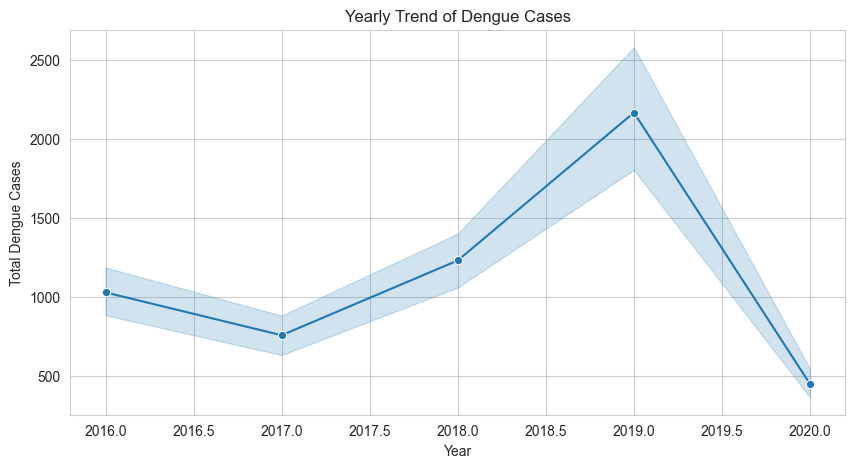

In [29]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=dengue, x="Year", y="Dengue_Cases", marker="o")
plt.title("Yearly Trend of Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.show()








<h1>Insight 2: Dengue Cases by Region</h1>

C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\3583265161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dengue, x="Region", y="Dengue_Cases",palette="viridis")


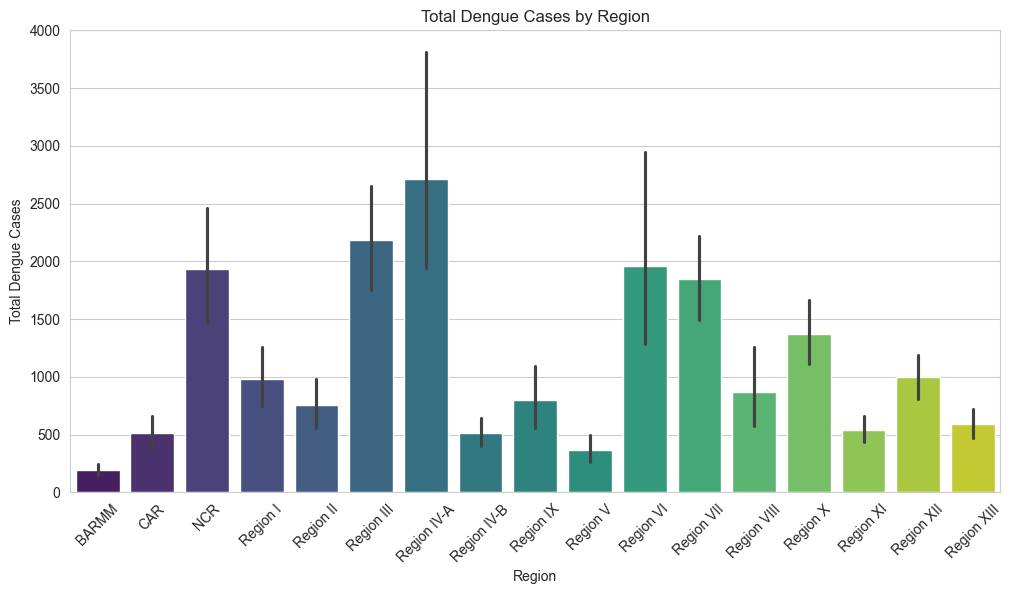

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(data=dengue, x="Region", y="Dengue_Cases",palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Dengue Cases by Region")
plt.xlabel("Region")
plt.ylabel("Total Dengue Cases")
plt.show()


<h1>Insight 3: Monthly Trend of Dengue Cases

C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\3024483860.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_cases = dengue.groupby("Region")["Dengue_Cases"].sum().reset_index()
C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\3024483860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_cases, x="Region", y="Dengue_Cases", palette="viridis")


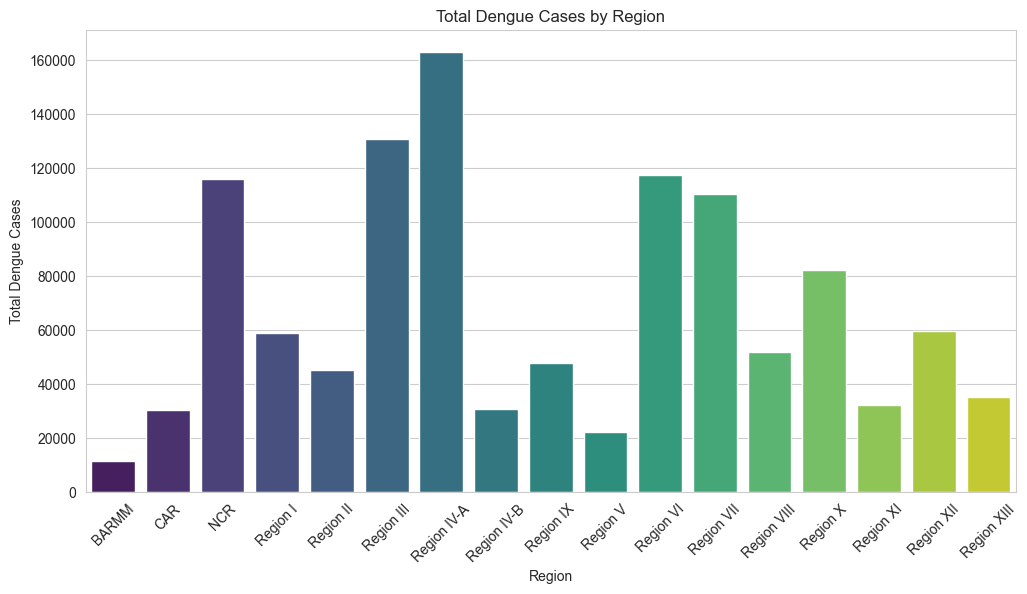

In [36]:
region_cases = dengue.groupby("Region")["Dengue_Cases"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=region_cases, x="Region", y="Dengue_Cases", palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Dengue Cases by Region")
plt.xlabel("Region")
plt.ylabel("Total Dengue Cases")
plt.show()


<h1>Insight 4: Dengue Mortality Rate by Region

C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\2541455160.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cases = dengue.groupby("Month")["Dengue_Cases"].sum().reset_index()


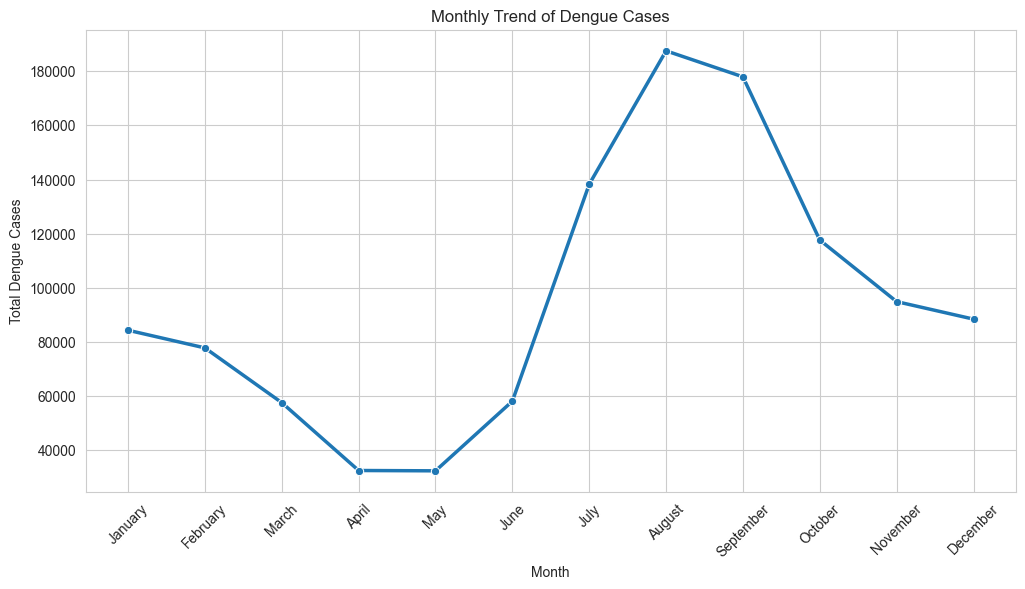

In [38]:
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
dengue["Month"] = pd.Categorical(dengue["Month"], categories=month_order, ordered=True)
monthly_cases = dengue.groupby("Month")["Dengue_Cases"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cases, x="Month", y="Dengue_Cases", marker="o", linewidth=2.5)
plt.xticks(rotation=45)
plt.title("Monthly Trend of Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Total Dengue Cases")
plt.grid(True)
plt.show()


<h1>Insight 5: Dengue Cases vs. Deaths Over Time</h1>

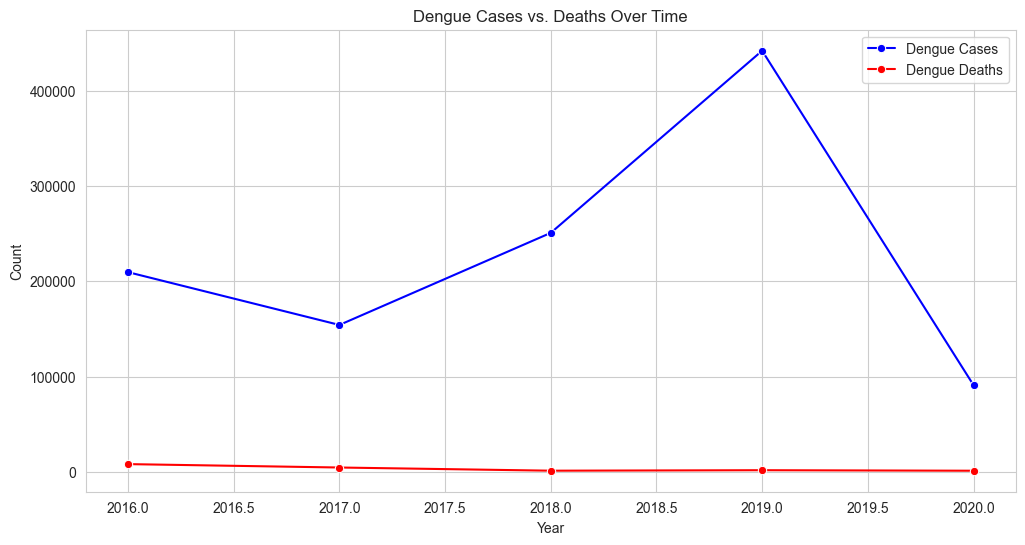

In [67]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index(), 
             x="Year", y="Dengue_Cases", marker="o", label="Dengue Cases", color="blue")
sns.lineplot(data=dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index(), 
             x="Year", y="Dengue_Deaths", marker="o", label="Dengue Deaths", color="red")

plt.title("Dengue Cases vs. Deaths Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()



<h1>Insight 6: Monthly Dengue Cases Over the Years</h1>

C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\605397545.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  monthly_yearly_cases = dengue.pivot_table(values="Dengue_Cases", index="Year", columns="Month", aggfunc="sum")


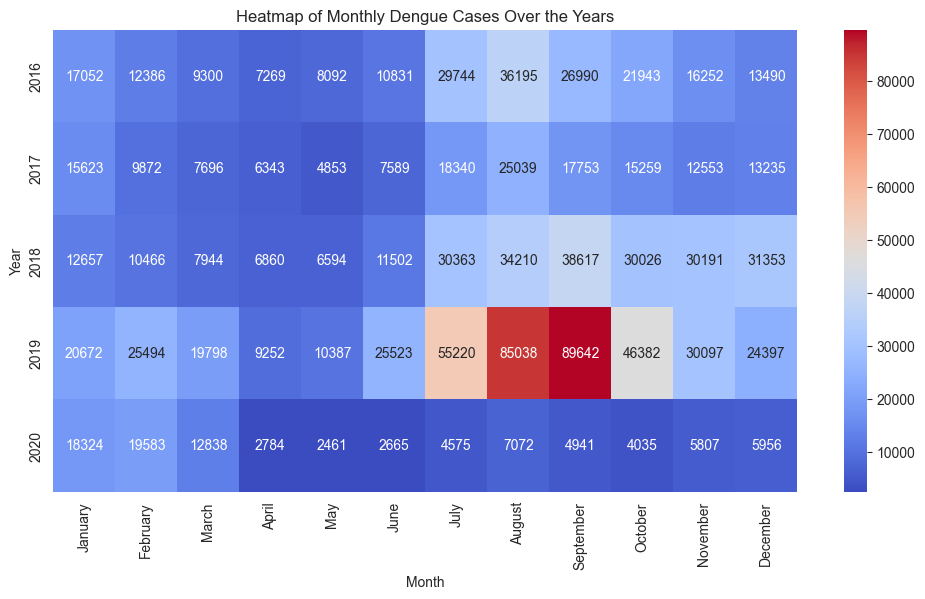

In [80]:
monthly_yearly_cases = dengue.pivot_table(values="Dengue_Cases", index="Year", columns="Month", aggfunc="sum")

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_yearly_cases, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Heatmap of Monthly Dengue Cases Over the Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


<h1>Insight 7: Distribution of Dengue Cases per Region</h1>

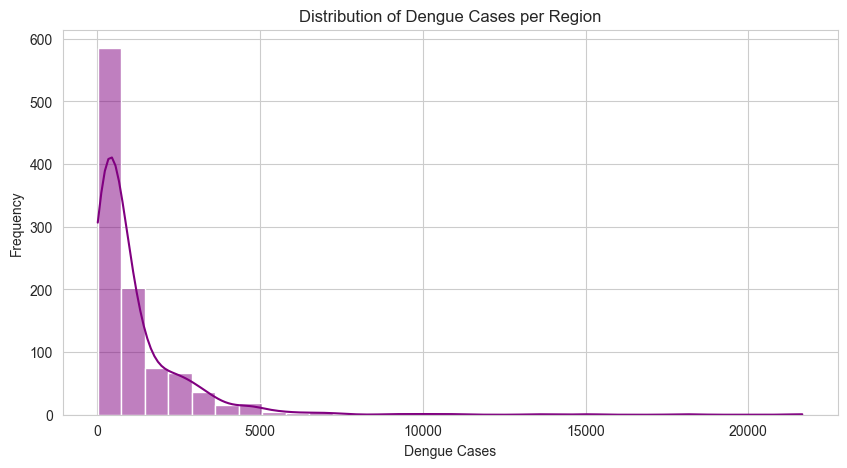

In [79]:
plt.figure(figsize=(10, 5))
sns.histplot(dengue["Dengue_Cases"], bins=30, kde=True, color="purple")
plt.title("Distribution of Dengue Cases per Region")
plt.xlabel("Dengue Cases")
plt.ylabel("Frequency")
plt.show()


<h1>Insight 8: Annual Growth Rate of Dengue Cases</h1>

C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\2677137453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_cases, x="Year", y="Dengue_Cases", palette="viridis")


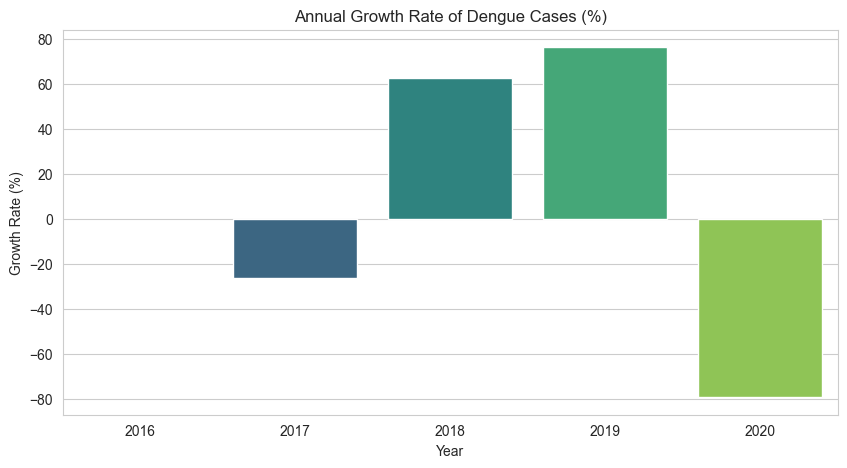

In [78]:
yearly_cases = dengue.groupby("Year")["Dengue_Cases"].sum().pct_change() * 100
yearly_cases = yearly_cases.reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=yearly_cases, x="Year", y="Dengue_Cases", palette="viridis")
plt.title("Annual Growth Rate of Dengue Cases (%)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.show()


<h1>Insight 9: Fatality Rate by Month</h1>

C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\3589732563.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_fatality = dengue.groupby("Month")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()


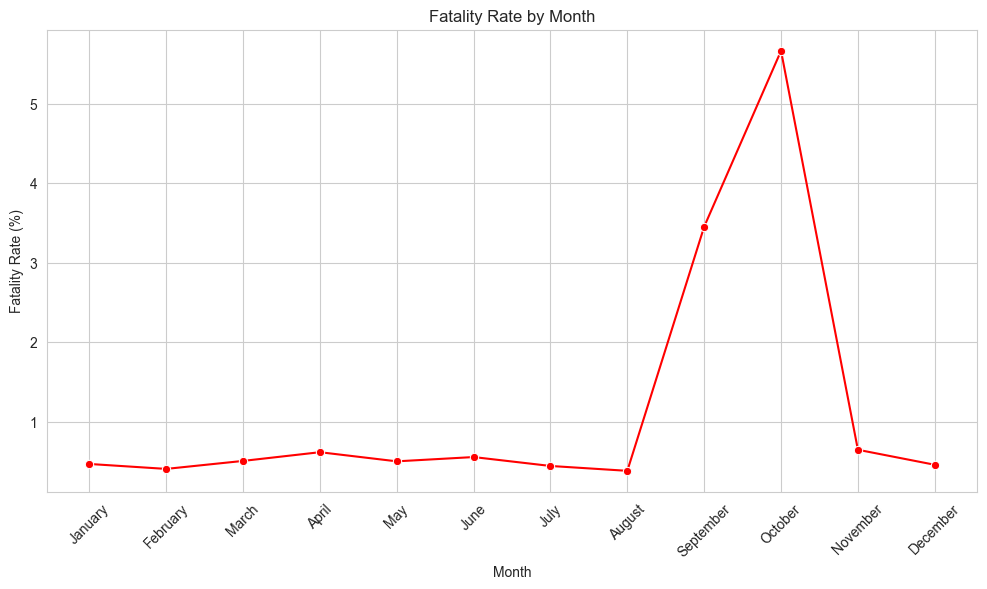

In [75]:
monthly_fatality = dengue.groupby("Month")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()
monthly_fatality["Fatality Rate (%)"] = (monthly_fatality["Dengue_Deaths"] / monthly_fatality["Dengue_Cases"]) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_fatality, x="Month", y="Fatality Rate (%)", marker="o", color="red")
plt.xticks(rotation=45)
plt.title("Fatality Rate by Month")
plt.xlabel("Month")
plt.ylabel("Fatality Rate (%)")
plt.grid(True)
plt.show()


<h1>Insight 10: Comparison of Dengue Cases During Rainy and Dry Seasons</h1>

C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\2659030421.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=dengue, x="Season", y="Dengue_Cases", palette="coolwarm")


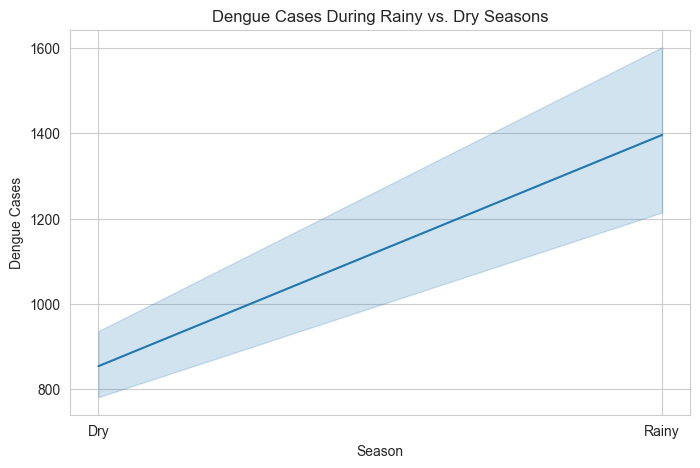

In [74]:
dengue["Season"] = dengue["Month"].map(lambda x: "Rainy" if x in ["May", "June", "July", "August", "September", "October"] else "Dry")

plt.figure(figsize=(8, 5))
sns.lineplot(data=dengue, x="Season", y="Dengue_Cases", palette="coolwarm")
plt.title("Dengue Cases During Rainy vs. Dry Seasons")
plt.xlabel("Season")
plt.ylabel("Dengue Cases")
plt.show()


<h1>Insight 11: Monthly Dengue Cases vs. Monthly Dengue Deaths

C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\3523707641.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.scatterplot(data=dengue.groupby("Month")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index(),


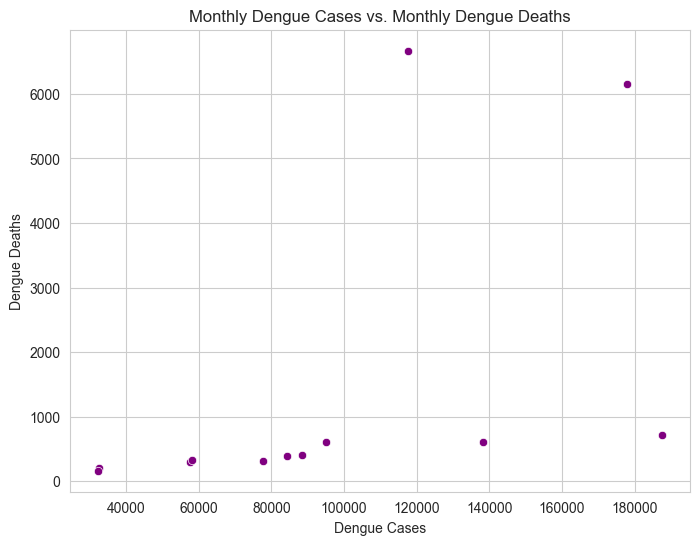

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dengue.groupby("Month")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index(),
                x="Dengue_Cases", y="Dengue_Deaths", marker="o", color="purple")
plt.title("Monthly Dengue Cases vs. Monthly Dengue Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()


<h1>Insight 12: Cases and Deaths by Year</h1>

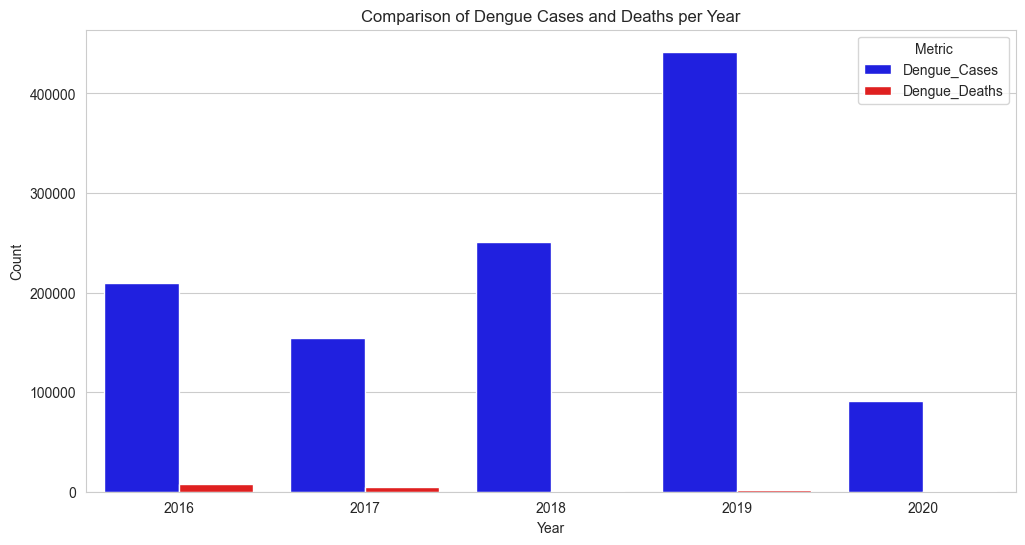

In [66]:
yearly_totals = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_totals.melt(id_vars=["Year"], var_name="Metric", value_name="Count"),
            x="Year", y="Count", hue="Metric", palette=["blue", "red"])
plt.title("Comparison of Dengue Cases and Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


<h1>Insight 13: Most and Least Affected Regions</h1>

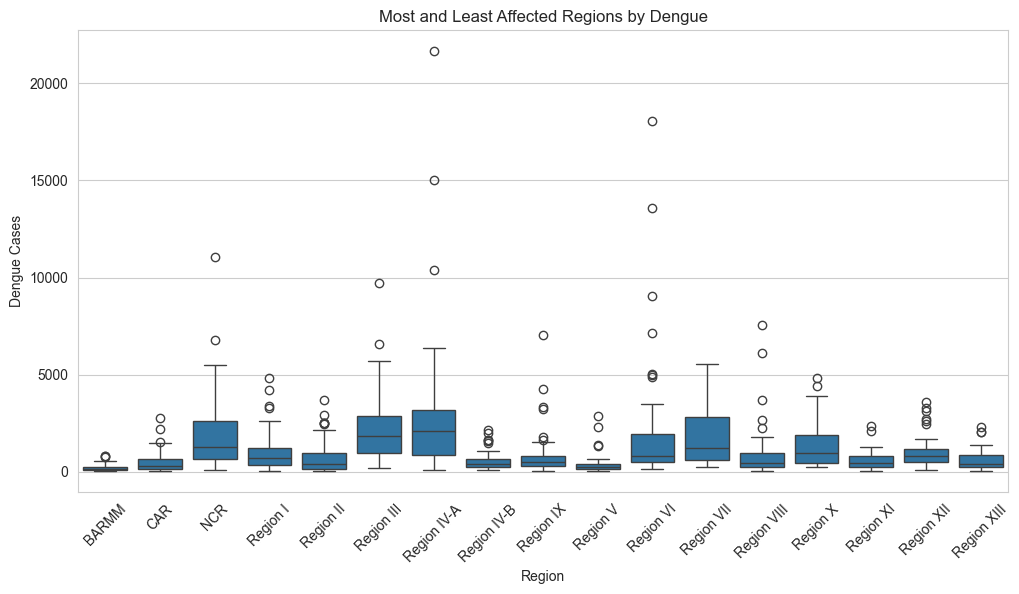

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dengue, x="Region", y="Dengue_Cases")
plt.xticks(rotation=45)
plt.title("Most and Least Affected Regions by Dengue")
plt.xlabel("Region")
plt.ylabel("Dengue Cases")
plt.show()


<h1>Insight 14: Dengue Cases Before and After Peak Season</h1>

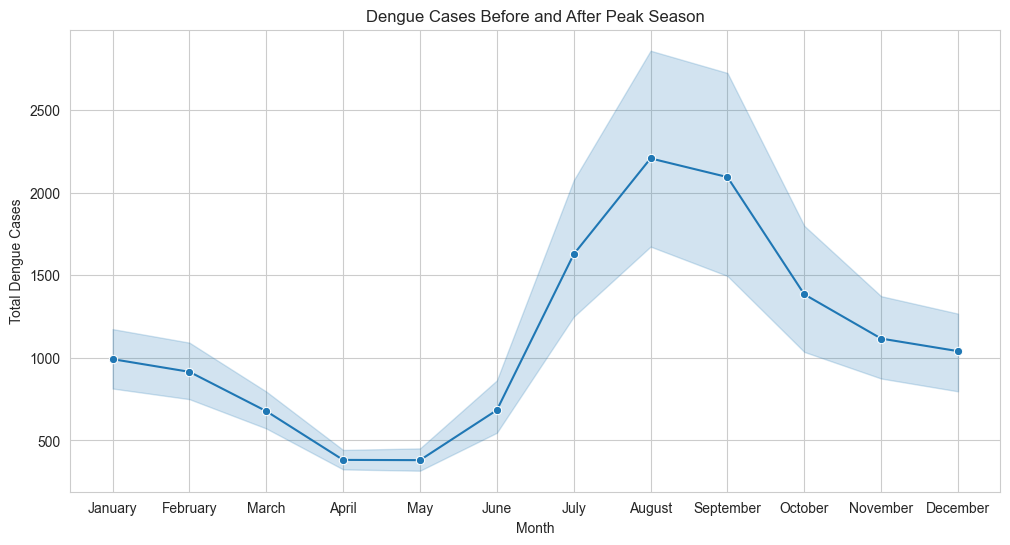

In [63]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dengue, x="Month", y="Dengue_Cases", marker="o")
plt.title("Dengue Cases Before and After Peak Season")
plt.xlabel("Month")
plt.ylabel("Total Dengue Cases")
plt.show()


<h1>Insight 15: Relationship Between Dengue Cases and Deaths</h1>

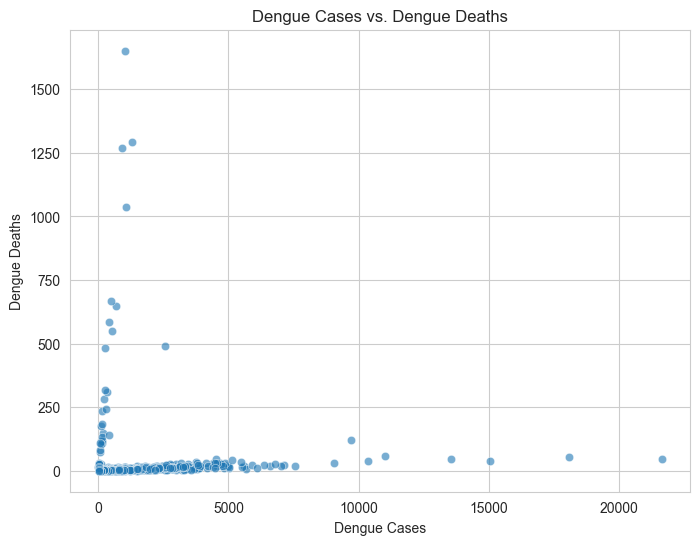

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths", alpha=0.6)
plt.title("Dengue Cases vs. Dengue Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()


<h1>Insight 16: Monthly Distribution of Dengue Cases

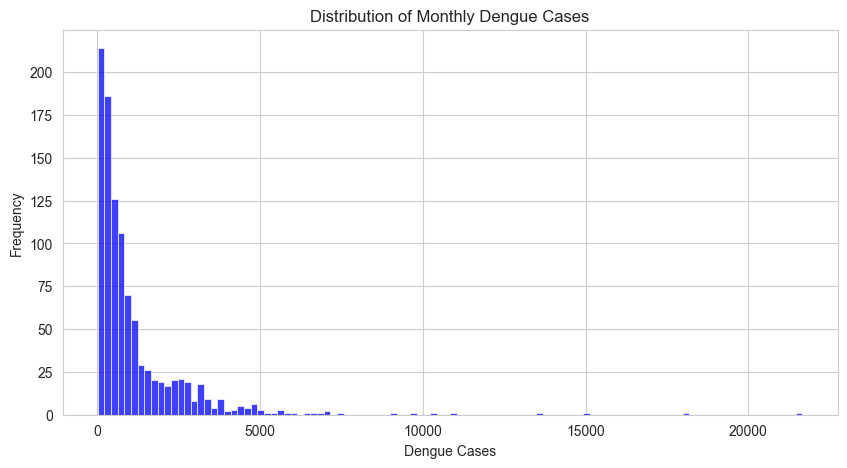

In [58]:
plt.figure(figsize=(10, 5))
sns.histplot(dengue["Dengue_Cases"], color="blue")
plt.title("Distribution of Monthly Dengue Cases")
plt.xlabel("Dengue Cases")
plt.ylabel("Frequency")
plt.show()


<h1>Insight 17: Proportion of Dengue Cases by Region</h1>

C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\1376121127.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_cases = dengue.groupby("Region")["Dengue_Cases"].sum()


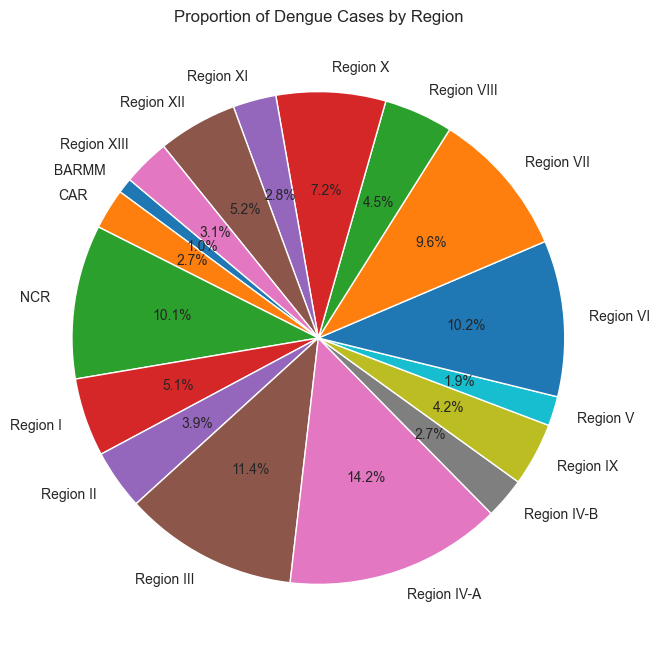

In [55]:
region_cases = dengue.groupby("Region")["Dengue_Cases"].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_cases, labels=region_cases.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Dengue Cases by Region")
plt.show()


<h1>Insight 18: Top 5 Years with the Most Dengue Cases</h1>

C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\1101266741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_years, x="Year", y="Dengue_Cases", palette="Reds_r")


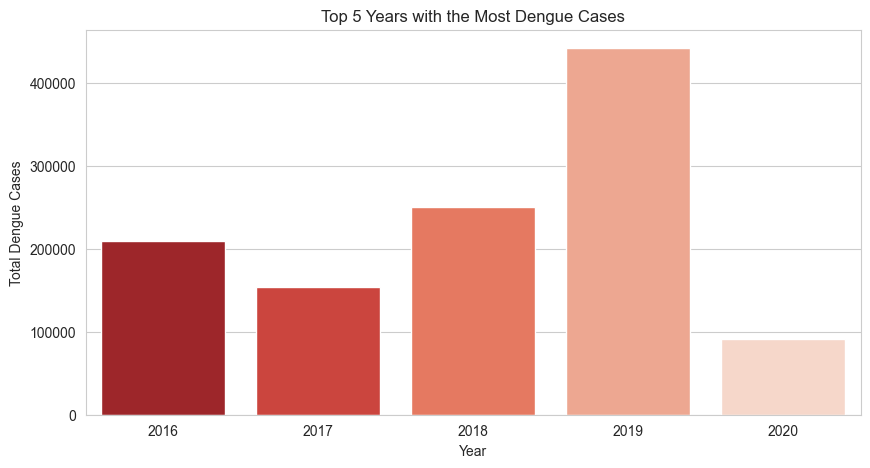

In [53]:
top_years = dengue.groupby("Year")["Dengue_Cases"].sum().nlargest(5).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=top_years, x="Year", y="Dengue_Cases", palette="Reds_r")
plt.title("Top 5 Years with the Most Dengue Cases")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.show()


<h1> Insight 19: Top 5 Regions with Highest Dengue Cases

C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\3708466598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, x="Region", y="Dengue_Cases", palette="Reds_r")


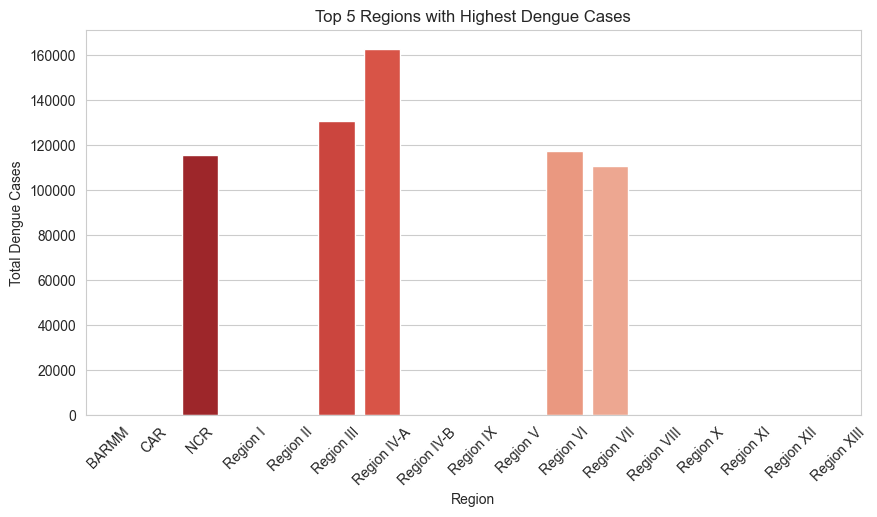

In [42]:
top_regions = region_cases.sort_values(by="Dengue_Cases", ascending=False).head(5)


plt.figure(figsize=(10, 5))
sns.barplot(data=top_regions, x="Region", y="Dengue_Cases", palette="Reds_r")
plt.xticks(rotation=45)
plt.title("Top 5 Regions with Highest Dengue Cases")
plt.xlabel("Region")
plt.ylabel("Total Dengue Cases")
plt.show()


<h1>Insight 20 : Seasonal Impact on Dengue Cases

C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\2821809665.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_cases = dengue.groupby("Month")["Dengue_Cases"].sum().reset_index()
C:\Users\cathe\AppData\Local\Temp\ipykernel_11044\2821809665.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_cases, x="Month", y="Dengue_Cases", palette="Blues_r")


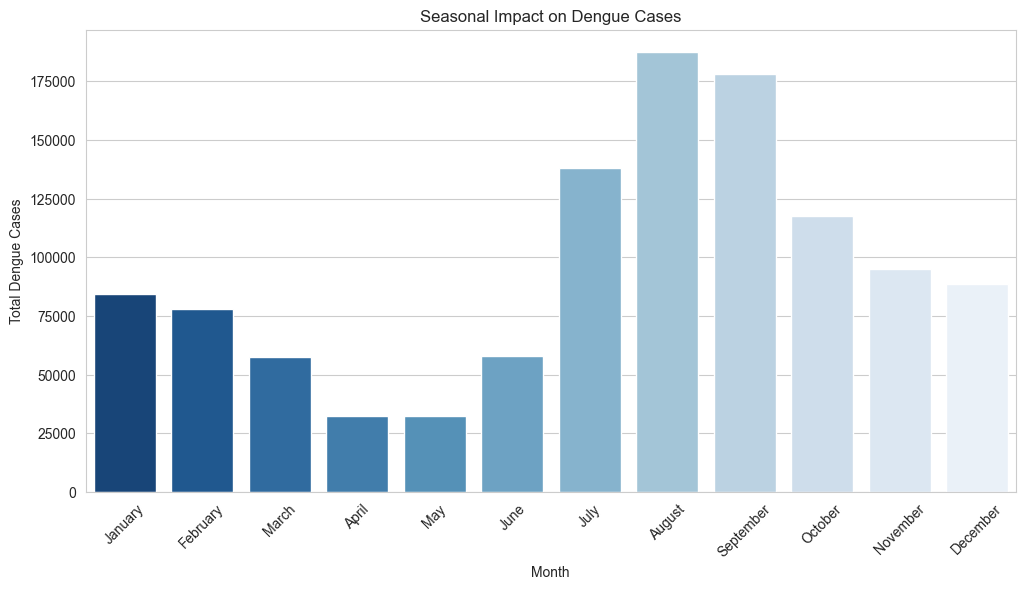

In [41]:
seasonal_cases = dengue.groupby("Month")["Dengue_Cases"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=seasonal_cases, x="Month", y="Dengue_Cases", palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Seasonal Impact on Dengue Cases")
plt.xlabel("Month")
plt.ylabel("Total Dengue Cases")
plt.show()
